## Why perform EDA?
1. Detecting pattern and relationship
2. Generating questions or hypotheses
3. Preparing data for ML.

## Represntaive data
1. Sample representation the population

## Categorical class
1. Classes= labels


In [162]:
import pandas as pd

planes = pd.read_csv('planes.csv')
planes['Destination'].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [163]:
## class frequency
pd.crosstab(planes['Source'],planes['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [164]:
pd.crosstab(planes['Source'],planes['Destination'],values=planes['Price'],aggfunc='median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


## Generate new feature

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
def convert(time_str):
    parts = time_str.split()
    time = 0
    print(parts)
    for i in parts:
        if 'h' in i:
            time += int(i.replace('h','')) * 60
        if 'm' in i:
            time += int(i.replace('m','')) * 60
    return time

In [167]:
planes = pd.read_csv('planes.csv')

In [168]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [169]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [170]:
planes['Duration'].astype('str')

0            19h
1         5h 25m
2         4h 45m
3         2h 25m
4        15h 30m
          ...   
10655     2h 30m
10656     2h 35m
10657         3h
10658     2h 40m
10659     8h 20m
Name: Duration, Length: 10660, dtype: object

In [171]:
planes.dropna(inplace=True)

In [172]:
planes['Duration'] = planes['Duration'].apply(convert)

['19h']
['5h', '25m']
['4h', '45m']
['2h', '25m']
['15h', '30m']
['21h', '5m']
['25h', '30m']
['7h', '50m']
['13h', '15m']
['2h', '35m']
['2h', '15m']
['12h', '10m']
['2h', '35m']
['26h', '35m']
['4h', '30m']
['22h', '35m']
['23h']
['20h', '35m']
['15h', '20m']
['2h', '50m']
['2h', '55m']
['13h', '20m']
['15h', '10m']
['5h', '45m']
['5h', '55m']
['2h', '50m']
['2h', '15m']
['2h', '15m']
['13h', '25m']
['2h', '50m']
['22h']
['5h', '30m']
['10h', '25m']
['5h', '15m']
['6h', '15m']
['11h', '55m']
['8h', '30m']
['22h', '5m']
['12h']
['2h', '50m']
['2h', '15m']
['16h', '5m']
['19h', '55m']
['3h', '15m']
['25h', '20m']
['2h', '50m']
['3h']
['2h', '50m']
['16h', '15m']
['15h', '5m']
['2h', '15m']
['6h', '30m']
['25h', '5m']
['27h', '20m']
['10h', '30m']
['2h', '15m']
['10h', '25m']
['2h', '50m']
['1h', '30m']
['13h', '20m']
['1h', '25m']
['26h', '30m']
['13h', '30m']
['2h', '45m']
['1h', '30m']
['2h', '15m']
['2h', '40m']
['22h', '10m']
['9h', '35m']
['10h']
['21h', '20m']
['18h', '45m']
['9h

In [173]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1800,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,2940,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,1620,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,2700,1 stop,In-flight meal not included,11087.0


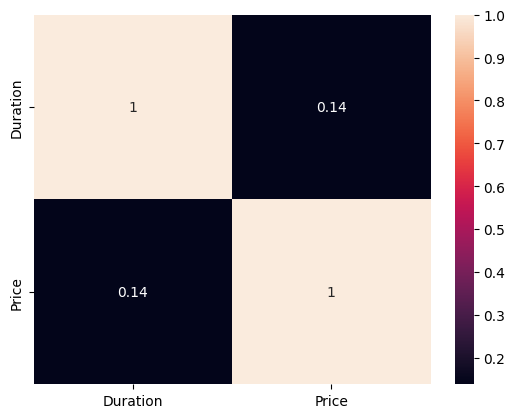

In [174]:
sns.heatmap(planes.corr(numeric_only=True),annot=True)
plt.show()

In [175]:
planes['Date_of_Journey'] = pd.to_datetime(planes['Date_of_Journey'],format="%d/%m/%Y")

In [176]:
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'])

/var/folders/sc/ldvyw7gd6tv8q7ry2q_605x00000gn/T/ipykernel_29647/3576028941.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'])


In [177]:
planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'])

/var/folders/sc/ldvyw7gd6tv8q7ry2q_605x00000gn/T/ipykernel_29647/2584004913.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'])


In [178]:
planes.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [179]:
planes['Total_Stops'].value_counts()

Total_Stops
1 stop      4107
non-stop    2584
2 stops     1127
3 stops       29
4 stops        1
Name: count, dtype: int64

In [187]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops','')
planes['Total_Stops']  = planes['Total_Stops'].str.replace(' stop','')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop','0')

In [189]:
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

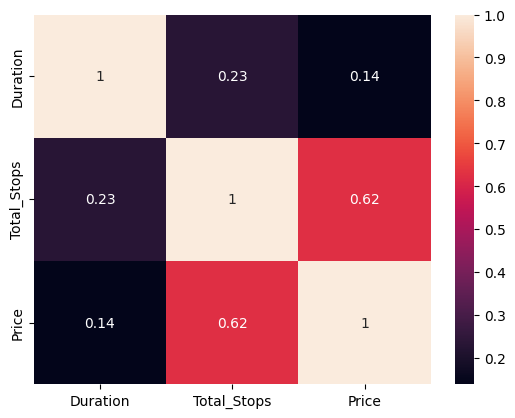

In [190]:
sns.heatmap(planes.corr(numeric_only=True),annot=True)
plt.show()

In [191]:
planes.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                 int64
Additional_Info            object
Price                     float64
dtype: object

In [192]:
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
planes[['month','weekday','Date_of_Journey']].head()

,month,weekday,Date_of_Journey
0,6,6,2019-06-09
1,5,6,2019-05-12
2,3,4,2019-03-01
3,6,0,2019-06-24
4,3,1,2019-03-12


In [193]:
planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour

In [194]:
planes[['Dep_Hour','Dep_Time']]

,Dep_Hour,Dep_Time
0,9,2024-08-02 09:25:00
1,18,2024-08-02 18:05:00
2,16,2024-08-02 16:50:00
3,9,2024-08-02 09:00:00
4,18,2024-08-02 18:55:00
...,...,...
10654,5,2024-08-02 05:55:00
10655,19,2024-08-02 19:55:00
10656,20,2024-08-02 20:45:00
10658,11,2024-08-02 11:30:00


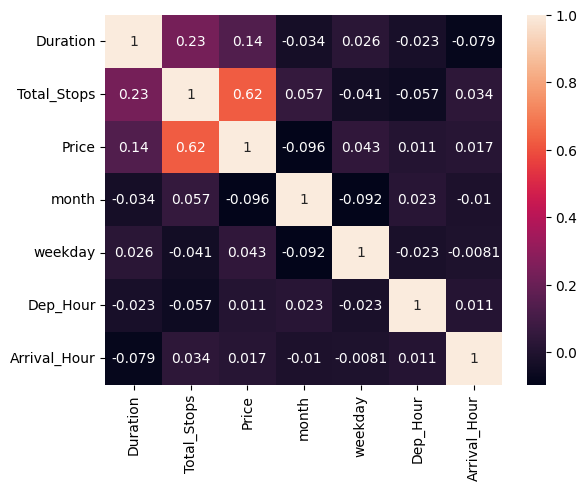

In [195]:
sns.heatmap(planes.corr(numeric_only=True),annot=True)
plt.show()

In [196]:
## Descriptive statiscis
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)

maximum = planes['Price'].max()

In [197]:
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0,twenty_fifth,median,seventy_fifth,maximum]

planes['Ticket_Category'] = pd.cut(planes['Price'],labels=labels,bins=bins)


In [198]:
planes[['Price','Ticket_Category']].head()

,Price,Ticket_Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class


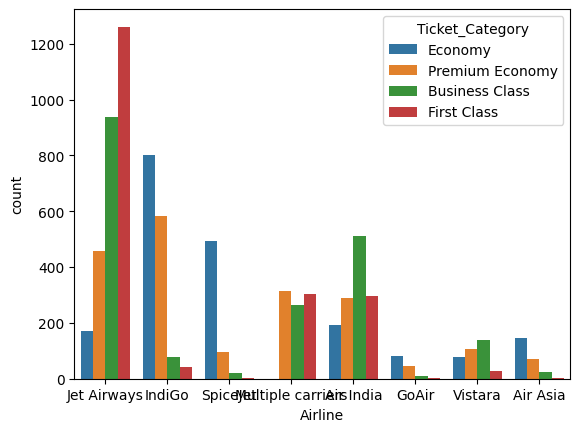

In [199]:
sns.countplot(data=planes, x='Airline',hue='Ticket_Category')
plt.show()

## Generating Hypotheses
Detecting relationship, differences and patters we use Hypothesis testing.
It require prior to data collections, generating hypothesis or question. A decision on what statistical test to use 